https://mp.weixin.qq.com/s/KEbGiHGrEOOtGYwvUi7XLw

https://www.cnblogs.com/stevenlk/p/6543628.html

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [7]:
df = pd.read_csv('../../dataset/mushrooms.csv')

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [9]:
X = pd.get_dummies(X,prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)

In [10]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
X2 = StandardScaler().fit_transform(X)

In [13]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30,  random_state = 101)

In [15]:
# 特征重要性
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.359375
[[1274    0]
 [   0 1164]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438



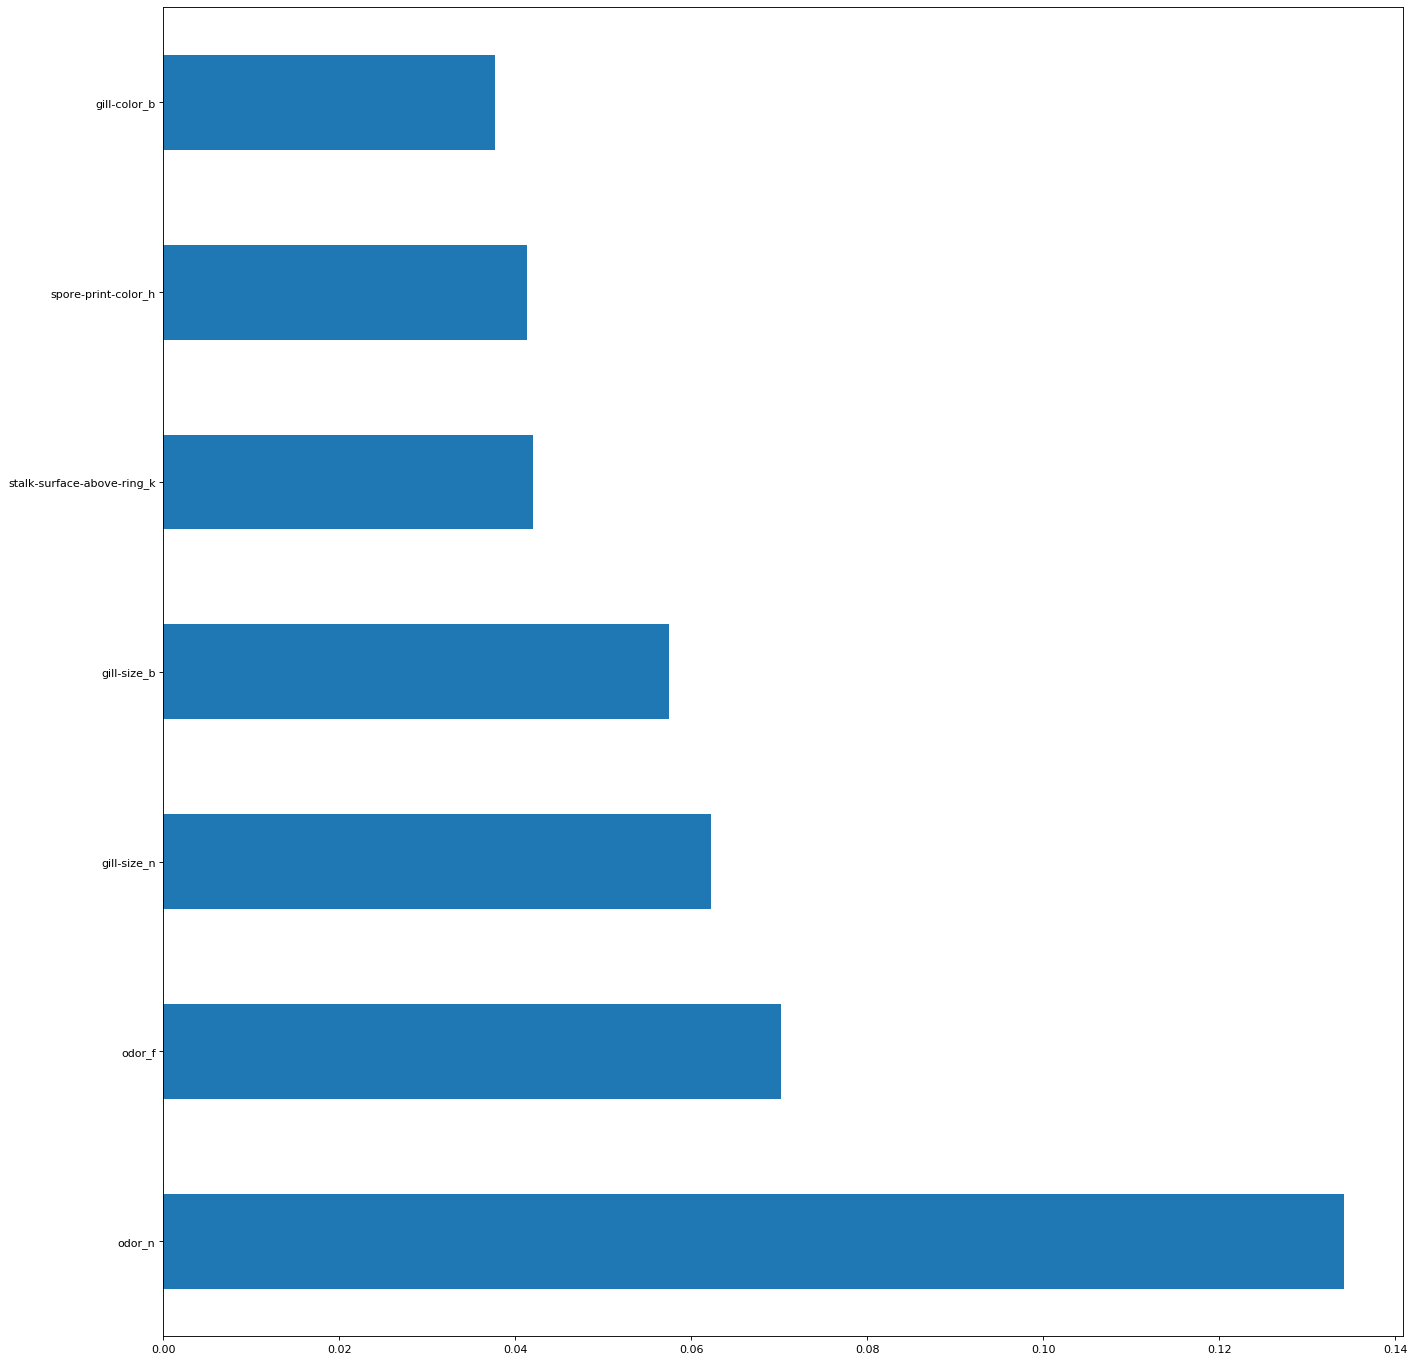

In [16]:
figure(num=None,figsize=(20,22),dpi=80,facecolor='w',edgecolor='k')
feat_importances = pd.Series(trainedforest.feature_importances_,index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [17]:
# 尝试使用前3个特征来训练我们的模型
X_Reduced = X[['odor_n','odor_f', 'gill-size_n','gill-size_b']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30,  random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

0.75
[[1248   26]
 [  53 1111]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1274
          1       0.98      0.95      0.97      1164

avg / total       0.97      0.97      0.97      2438



In [18]:
# 通过可视化一个训练过的决策树来理解如何进行特征选择
start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

0.03125
[[1274    0]
 [   0 1164]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438



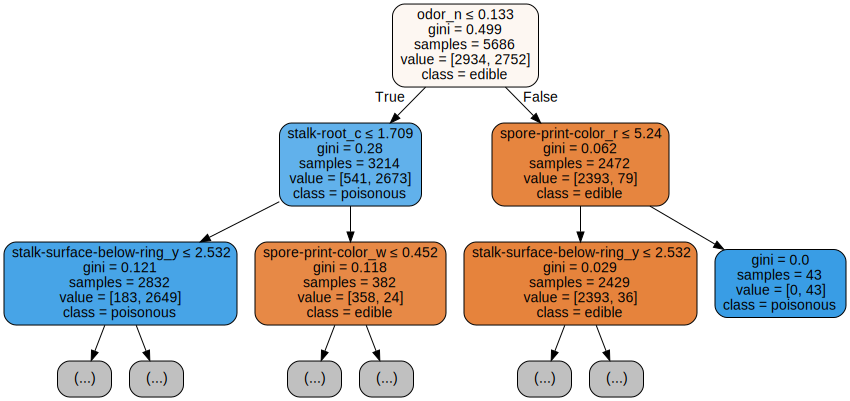

In [19]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
        class_names=['edible', 'poisonous'], 
        filled=True, rounded=True, 
        max_depth=2,
        special_characters=True)
graph = graphviz.Source(data)
graph

In [36]:
# 递归特征消除法（RFE）
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model,4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe_1 = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() -start)
print("Overall Accuracy using RFE: ", rfe_1.score(RFE_X_Test,Y_Test))

127.203125
Overall Accuracy using RFE:  0.9753896636587367


In [37]:
# SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train, Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)

start = time.process_time()
trainedforest = RandomForestClassifier(
    n_estimators=700).fit(Selected_X, Y_Train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_Test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_Test, predictionforest))
print(classification_report(Y_Test, predictionforest))

0.046875
0.90625
[[1274    0]
 [   0 1164]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438



In [38]:
# 相关矩阵分析
Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = Y
corr = Numeric_df.corr()
corr_y = abs(corr['Y'])
highest_corr = corr_y[corr_y > 0.5]
highest_corr.sort_values(ascending=True)

bruises_f                     0.501530
bruises_t                     0.501530
gill-color_b                  0.538808
gill-size_b                   0.540024
gill-size_n                   0.540024
ring-type_p                   0.540469
stalk-surface-below-ring_k    0.573524
stalk-surface-above-ring_k    0.587658
odor_f                        0.623842
odor_n                        0.785557
Y                             1.000000
Name: Y, dtype: float64

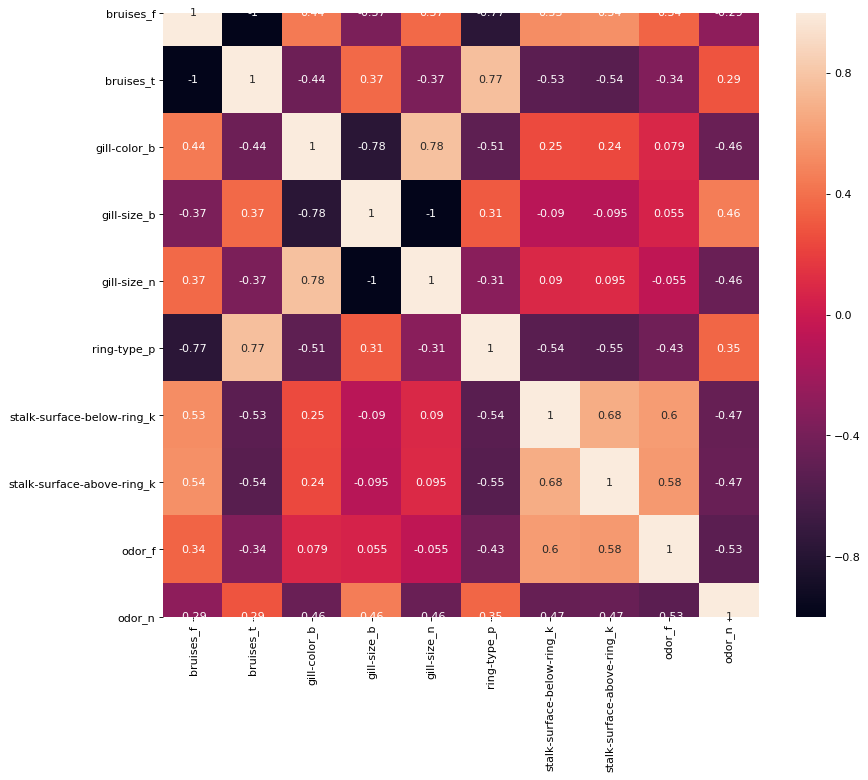

In [39]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
corr2 = Numeric_df[['bruises_f' , 'bruises_t' , 'gill-color_b' , 'gill-size_b' ,  'gill-size_n' , 'ring-type_p' , 'stalk-surface-below-ring_k' ,  'stalk-surface-above-ring_k' , 'odor_f', 'odor_n']].corr()
sns.heatmap(corr2, annot=True, fmt=".2g")

In [40]:
# 单变量选择

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X2)

X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X, Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30,  random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

0.71875
[[1015  259]
 [  41 1123]]
             precision    recall  f1-score   support

          0       0.96      0.80      0.87      1274
          1       0.81      0.96      0.88      1164

avg / total       0.89      0.88      0.88      2438



In [41]:
# 索套回归

from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:-1]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

LassoCV Best Alpha Scored:  0.0003964898084478826
LassoCV Model Accuracy:  0.9971840741918596
Variables Eliminated:  73
Variables Kept:  44


C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

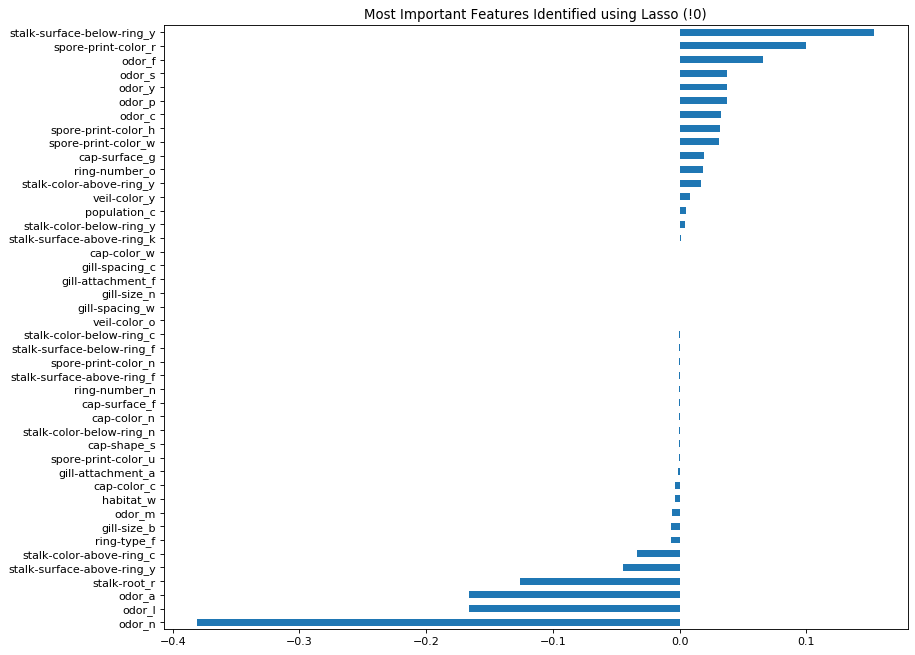

In [42]:

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")